In [2]:
#Load modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
import scipy.io
import pandas as pd
from IPython.display import display, clear_output
import sys, os
import warnings

warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture

import itertools

from sklearn.cluster import SpectralClustering, AffinityPropagation
import sklearn

Generate mixture of kappa/Gaussian distributions (k=2 kappa, k=200 Gaussian)

[1.063118804868271, 0.5482472838289189, 4.134837946771302]
[2.312641244212015, 6.448761961017543, 5.671873889273895]
[3.915731848449968, 2.9741984206745813, 6.9243237780055145]
[6.586030801927345, 6.195627933558527, 5.918765223033154]
[1.9655879332757438, 2.0243229455752436, 2.004285359402094]
[2.0167841090044045, 2.062487035753097, 2.0408188993588943]
[1.9939044582418874, 2.020950125222626, 1.9780764687640913]
[1.9902548812903806, 2.0116984330142245, 1.9227200776452589]


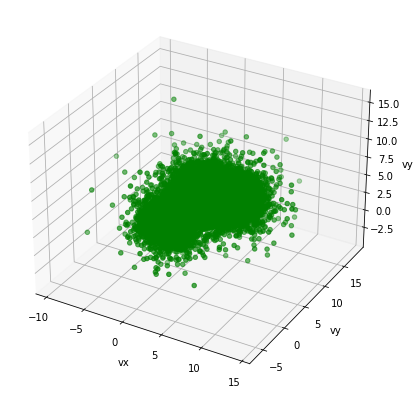

In [12]:
Np=5000 #Number of particles generated from distribution

from random import randint
import random

k_kappa_min=2
k_kappa_max=6  

NC=4   #Amount of clusters
b=7    #Maximum separation between means of the clusters
v0x=b*np.random.rand(NC) 
v0y=b*np.random.rand(NC)
v0z=b*np.random.rand(NC)
vpkx=[]
vpky=[] 
vpkz=[]
for ncomp in range(0,NC):
    
    k_kappa=random.uniform(k_kappa_min, k_kappa_max) #Use this line if you want to generate clusters from different kappa values
#     k_kappa=2.1 #k_kappa=2 for kappa distribution - k_kappa=200 for full gaussian


    uth=np.sqrt(2) #Thermal velocities
    vth=np.sqrt(2)
    apar = uth*uth*2.0*(k_kappa-1.5)/k_kappa
    aperp = vth*vth*2.0*(k_kappa-1.5)/k_kappa
    
    theta = 2.0 * np.pi * np.random.rand(Np)
    vpar=np.sqrt(k_kappa*apar*(pow(np.random.rand(Np),(-1.0/(k_kappa-0.5)))-1.0))*np.cos(theta)
    vperp=np.sqrt(k_kappa*aperp*(1.0+vpar*vpar/(k_kappa*apar+1e-10))*(pow((1.0-np.random.rand(Np)),(-1.0/k_kappa))-1.0))

    theta = 2*np.pi*np.random.rand(Np)
    vpkx2=v0x[ncomp]+vpar
    vpky2=v0y[ncomp]+vperp * np.cos(theta)
    vpkz2=v0z[ncomp]+vperp * np.sin(theta)
    
    vpkx.append(vpkx2)
    vpky.append(vpky2)
    vpkz.append(vpkz2)

    

vpkx = list(np.concatenate(vpkx). flat)
vpky = list(np.concatenate(vpky). flat)
vpkz = list(np.concatenate(vpkz). flat)   
Xdata=np.array([vpkx,vpky,vpkz])

Xdata=np.conjugate(Xdata).T  
#print(Xdata.shape)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating cluster plot
ax.scatter3D(Xdata[:,0], Xdata[:,1], Xdata[:,2], color = "green")
ax.set_xlabel('vx')
ax.set_ylabel('vy')
ax.set_zlabel('vy')

# ax.axes.set_xlim3d(left=0, right=12) 
# ax.axes.set_ylim3d(bottom=0, top=12) 
# ax.axes.set_zlim3d(bottom=0, top=12)

# Means of 4 clusters
print([np.mean(Xdata[:Np,0]),np.mean(Xdata[:Np,1]),np.mean(Xdata[:Np,2])])
print([np.mean(Xdata[Np:2*Np,0]),np.mean(Xdata[Np:2*Np,1]),np.mean(Xdata[Np:2*Np,2])])
print([np.mean(Xdata[2*Np:3*Np,0]),np.mean(Xdata[2*Np:3*Np,1]),np.mean(Xdata[2*Np:3*Np,2])])
print([np.mean(Xdata[3*Np:,0]),np.mean(Xdata[3*Np:,1]),np.mean(Xdata[3*Np:,2])])
#variances of 4 clusters
print([np.mean(np.abs(Xdata[:Np,0]-np.mean(Xdata[:Np,0]))**2),np.mean(np.abs(Xdata[:Np,1]-np.mean(Xdata[:Np,1]))**2),np.mean(np.abs(Xdata[:Np,2]-np.mean(Xdata[:Np,2]))**2)])
print([np.mean(np.abs(Xdata[Np:2*Np,0]-np.mean(Xdata[Np:2*Np,0]))**2),np.mean(np.abs(Xdata[Np:2*Np,1]-np.mean(Xdata[Np:2*Np,1]))**2),np.mean(np.abs(Xdata[Np:2*Np,2]-np.mean(Xdata[Np:2*Np,2]))**2)])
print([np.mean(np.abs(Xdata[2*Np:3*Np,0]-np.mean(Xdata[2*Np:3*Np,0]))**2),np.mean(np.abs(Xdata[2*Np:3*Np,1]-np.mean(Xdata[2*Np:3*Np,1]))**2),np.mean(np.abs(Xdata[2*Np:3*Np,2]-np.mean(Xdata[2*Np:3*Np,2]))**2)])
print([np.mean(np.abs(Xdata[3*Np:,0]-np.mean(Xdata[3*Np:,0]))**2),np.mean(np.abs(Xdata[3*Np:,1]-np.mean(Xdata[3*Np:,1]))**2),np.mean(np.abs(Xdata[3*Np:,2]-np.mean(Xdata[3*Np:,2]))**2)])
# show plot
plt.show()

Testing the dask_ml module

In [10]:

# import dask_ml.cluster
# fig.clear()


# Sil_Score=[]
# CH_score=[]
# clusters=list(range(2,10))

# for i in range(2,10):
#     dask_ml.cluster.SpectralClustering(n_clusters=i, n_components=100).fit(Xdata)
#     Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,clustering.labels_))
#     CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,clustering.labels_))
# plt.rcParams['figure.figsize'] = [10, 2]    
  
# plt.subplot(1, 2, 1)
# plt.plot(clusters,Sil_Score,'-o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette-score')


# plt.subplot(1, 2, 2) # index 2

# plt.plot(clusters,CH_score,'-o','r')
# plt.xlabel('Number of clusters')
# plt.ylabel('Calinski-Harabasz-score')

Spectral Clustering

In [ ]:
fig.clear()

import time 
from sklearn.cluster import SpectralClustering

tt=[]
Sil_Score=[]
CH_score=[]
clusters=list(range(2,10))
cores=list(range(1,8))

for j in range(1,8):
    t=time.time()
    for i in range(2,10):
        clustering = SpectralClustering(n_clusters=i,
             assign_labels='discretize', 
            random_state=0,affinity='nearest_neighbors',n_jobs=j).fit(Xdata)
        Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,clustering.labels_))
        CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,clustering.labels_))
    elapsed=time.time()-t
    tt.append(elapsed)

plt.plot(cores,tt,'-o')
plt.xlabel('Number of cores')
plt.ylabel('time (s)')

# plt.rcParams['figure.figsize'] = [10, 2]    
  
# plt.subplot(1, 2, 1)
# plt.plot(clusters,Sil_Score,'-o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette-score')


# plt.subplot(1, 2, 2) # index 2

# plt.plot(clusters,CH_score,'-o','r')
# plt.xlabel('Number of clusters')
# plt.ylabel('Calinski-Harabasz-score')
